In [106]:
import pandas as pd
import numpy as np 


In [107]:
df=pd.read_csv("E:/Workspace/Datasets/Iris.csv")

In [108]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [109]:
df=df.iloc[:,1:]

In [110]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [111]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [112]:
df["Species"]=le.fit_transform(df["Species"])

In [113]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,6.3,2.5,5.0,1.9,2
90,5.5,2.6,4.4,1.2,1
126,6.2,2.8,4.8,1.8,2
131,7.9,3.8,6.4,2.0,2
66,5.6,3.0,4.5,1.5,1


In [114]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [115]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

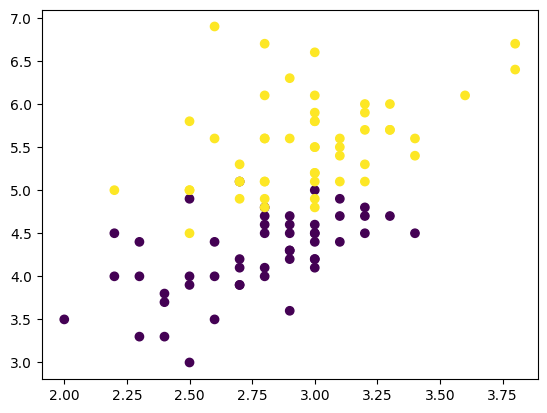

In [117]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'])


In [118]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
83,2.7,5.1,1
51,3.2,4.5,1
60,2.0,3.5,1
98,2.5,3.0,1
100,3.3,6.0,2
92,2.6,4.0,1
70,3.2,4.8,1
78,2.9,4.5,1
104,3.0,5.8,2
65,3.1,4.4,1


In [119]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)


In [120]:
df_val

,SepalWidthCm,PetalLengthCm,Species
77,3.0,5.0,1
116,3.0,5.5,2
148,3.4,5.4,2
56,3.3,4.7,1
119,2.2,5.0,2


In [121]:
df_test

,SepalWidthCm,PetalLengthCm,Species
81,2.4,3.7,1
125,3.2,6.0,2
73,2.8,4.7,1
91,3.0,4.6,1
130,2.8,6.1,2


In [122]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

## Case-1 Bagging

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [124]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [147]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag


,SepalWidthCm,PetalLengthCm,Species
138,3.0,4.8,2
72,2.5,4.9,1
124,3.3,5.7,2
143,3.2,5.9,2
140,3.1,5.6,2
124,3.3,5.7,2
140,3.1,5.6,2
140,3.1,5.6,2


In [148]:
dt_bag1 = DecisionTreeClassifier()


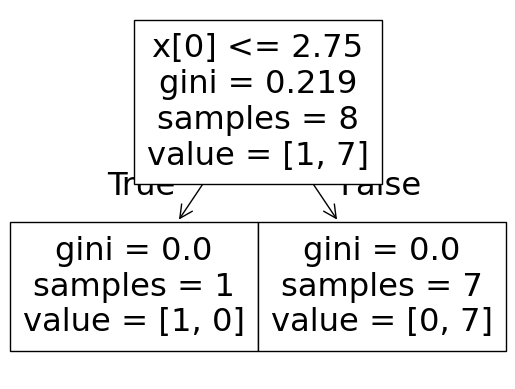

0.4


e:\Languages\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
e:\Languages\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


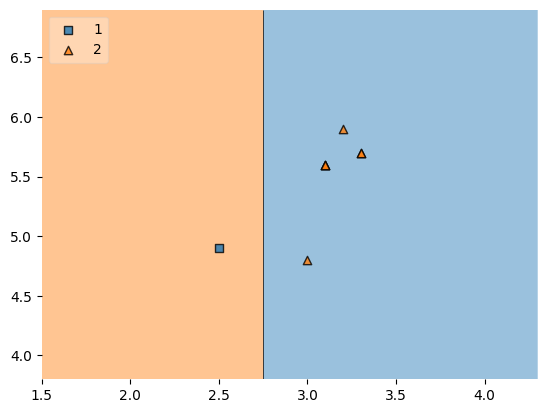

In [149]:
evaluate(dt_bag1,X,y)



In [150]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
72,2.5,4.9,1
117,3.8,6.7,2
102,3.0,5.9,2
102,3.0,5.9,2
72,2.5,4.9,1
127,3.0,4.9,2
142,2.7,5.1,2
140,3.1,5.6,2


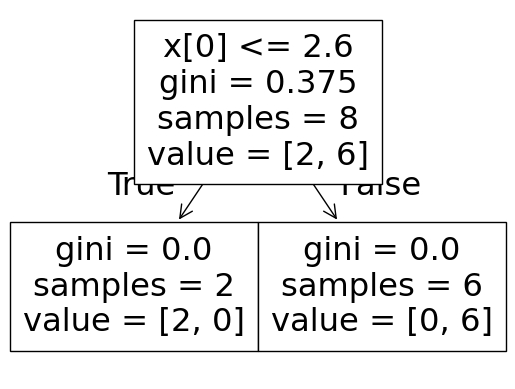

0.4


e:\Languages\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
e:\Languages\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


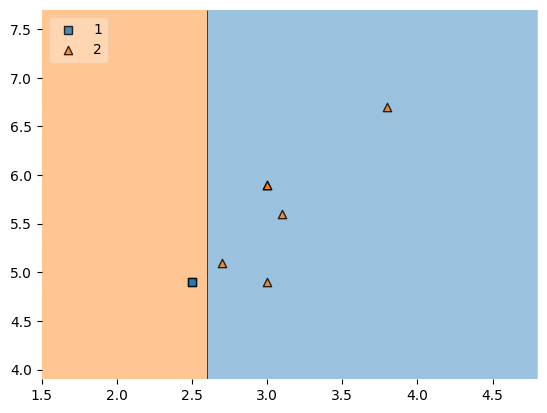

In [151]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [157]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
127,3.0,4.9,2
117,3.8,6.7,2
138,3.0,4.8,2
117,3.8,6.7,2
142,2.7,5.1,2
124,3.3,5.7,2
117,3.8,6.7,2
124,3.3,5.7,2


In [158]:
dt_bag3 = DecisionTreeClassifier()


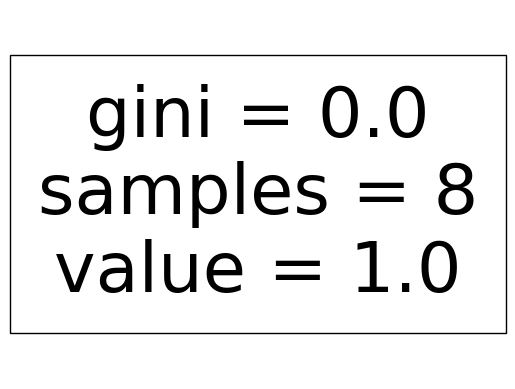

0.6


e:\Languages\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
e:\Languages\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


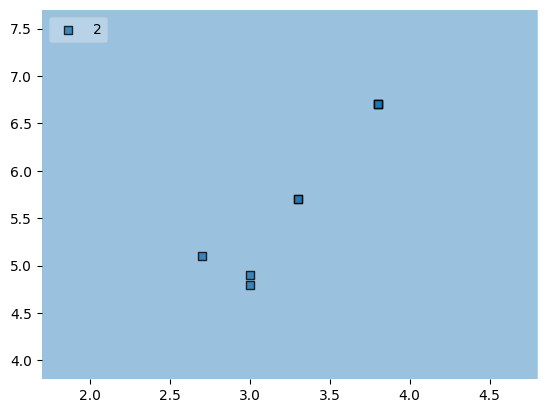

In [159]:
evaluate(dt_bag3,X,y)

## Predict 

In [160]:
df_test

,SepalWidthCm,PetalLengthCm,Species
81,2.4,3.7,1
125,3.2,6.0,2
73,2.8,4.7,1
91,3.0,4.6,1
130,2.8,6.1,2


In [161]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [2]


e:\Languages\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
e:\Languages\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
e:\Languages\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Pasting

In [162]:

# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
138,3.0,4.8,2
72,2.5,4.9,1
143,3.2,5.9,2
140,3.1,5.6,2
117,3.8,6.7,2
102,3.0,5.9,2
127,3.0,4.9,2
124,3.3,5.7,2
142,2.7,5.1,2
100,3.3,6.0,2


In [163]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
140,3.1,5.6,2
143,3.2,5.9,2
142,2.7,5.1,2
124,3.3,5.7,2
117,3.8,6.7,2
100,3.3,6.0,2
127,3.0,4.9,2
138,3.0,4.8,2


## Random Subspace 

In [166]:
df1=pd.read_csv("E:/Workspace/Datasets/Iris.csv")

In [167]:
df1.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
131,132,7.9,3.8,6.4,2.0,Iris-virginica
124,125,6.7,3.3,5.7,2.1,Iris-virginica
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
135,136,7.7,3.0,6.1,2.3,Iris-virginica
43,44,5.0,3.5,1.6,0.6,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
121,122,5.6,2.8,4.9,2.0,Iris-virginica
87,88,6.3,2.3,4.4,1.3,Iris-versicolor
134,135,6.1,2.6,5.6,1.4,Iris-virginica


In [168]:
df1.sample(2,replace=True,axis=1)

,SepalLengthCm,Id
0,5.1,1
1,4.9,2
2,4.7,3
3,4.6,4
4,5.0,5
...,...,...
145,6.7,146
146,6.3,147
147,6.5,148
148,6.2,149


## Random Patches

In [169]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [170]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,PetalWidthCm,SepalWidthCm
66,1.5,3.0
98,1.1,2.5
87,1.3,2.3
84,1.5,3.0
2,0.2,3.2
147,2.0,3.0
28,0.2,3.4
140,2.4,3.1
